<a href="https://colab.research.google.com/github/Phund4Bot/DZ/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №1
## Выполнил студент группы ГРУППА ФИО

### Оглавление
1. [Задание 1](#Задание-№1)
2. [Задание 2](#Задание-№2)
3. [Задание 3](#Задание-№3)
4. [Вывод](#Вывод)

### Задание №1
<i> Вызвать функцию print() и передать туда строку Hello, World! </i>

In [ ]:
print('Hello world')

Hello world


### Задание №2
Написать генератор случайных матриц(многомерных), который принимает
опциональные параметры <b>m</b>, <b>n</b>, <b>min_limit</b>, <b>max_limit</b>, где <b>m</b> и <b>n</b> указывают размер
матрицы, а <b>min_lim</b> и <b>max_lim</b> - минимальное и максимальное значение для
генерируемого числа.

In [ ]:
import random
import time
user_m = input()
user_n = input()
user_min_limit = input()
user_max_limit = input()
def generateMatrix(m, n, minlimit, maxlimit):
  matrix = []
  for i in range(int(m)):
    matrix.append([])
    for j in range(int(n)):
      matrix[i].append(random.randint(int(minlimit), int(maxlimit)))

  return matrix

print(generateMatrix(user_m, user_n, user_min_limit, user_max_limit))

2
2
3
6
[[4, 3], [4, 5]]


('2', '2', '3', '6')

### Задание №3
Реализовать методы сортировки строк числовой матрицы в соответствии с
заданием. Оценить время работы каждого алгоритма сортировки и сравнить его со
временем стандартной функции сортировки. Испытания проводить на сгенерированных
матрицах.

In [1]:
import copy
import random
import time
import matplotlib.pyplot as plt
import numpy as np

def generateMatrix(m, n, minlimit, maxlimit):
  matrix = []
  for i in range(int(m)):
    matrix.append([])
    for j in range(int(n)):
      matrix[i].append(random.randint(int(minlimit), int(maxlimit)))
  return matrix

def printMatrix(matrix):
  for k in range(0, len(matrix)):
    print(matrix[k])


def generateGraphic(myfunc, minb, maxb, step, size):
  x = []
  for i in range(minb, maxb, step):
    x.append(i)
  owny = []
  standy = []
  for k in range(minb, maxb, step):
    start_time = time.time()
    matrix = generateMatrix(size, k, 0, 100)
    copymatrix = copy.deepcopy(matrix)
    for i in range(0, len(matrix)):
      myfunc(copymatrix[i])
    myfunctime = round((time.time() - start_time)*1000)
    owny.append(myfunctime)

    start_time = time.time()
    copymatrix = copy.deepcopy(matrix)
    for i in range(0, len(copymatrix)):
      copymatrix[i].sort()
    standtime = round((time.time() - start_time)*1000)
    standy.append(standtime)

  plt.plot(x, owny, label="my", color="red")
  plt.plot(x, standy, label="standart", color="green")
  plt.xlabel('size')
  plt.ylabel('time')
  plt.legend()
  plt.show()

[0, 1, 5, 5, 6, 7, 7, 9, 9, 10]
[0, 0, 1, 1, 2, 2, 4, 4, 4, 7]
[1, 1, 3, 3, 4, 6, 6, 9, 9, 10]
[1, 2, 3, 4, 5, 5, 7, 8, 9, 10]
[0, 0, 1, 2, 3, 4, 4, 7, 8, 10]
[2, 2, 3, 4, 4, 6, 8, 8, 9, 10]
[0, 1, 1, 1, 3, 4, 5, 7, 7, 9]
[1, 3, 3, 5, 6, 6, 8, 9, 9, 9]
[1, 3, 4, 4, 6, 6, 7, 8, 8, 9]
[2, 6, 7, 7, 8, 8, 9, 10, 10, 10]


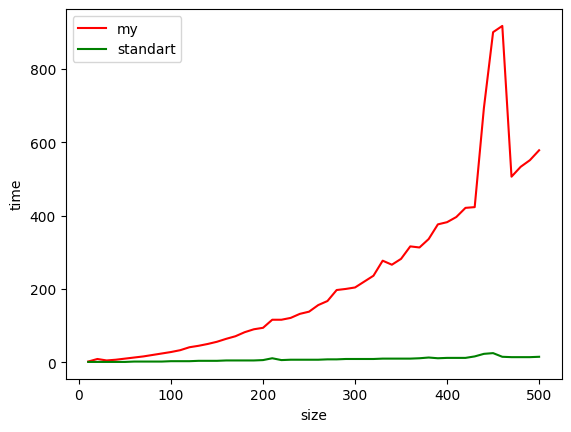

In [4]:
# Сортировка выбором.
# Берётся срез массива, в котором минимальный элемент переносят в самый левый угол,
# после чего срез уменьшается и цикл повторяется.
# Сложность: O(n^2)

def selectionSort(arr):
      for i in range(0, len(arr) - 1):
        minel = i
        for j in range(i + 1, len(arr)):
          if arr[j] < arr[minel]:
            minel = j
        arr[i], arr[minel] = arr[minel], arr[i]

matrix = generateMatrix(10, 10, 0, 10)
for i in range(0, len(matrix)):
  selectionSort(matrix[i])
printMatrix(matrix)

generateGraphic(selectionSort, 10, 501, 10, 50)

[0, 1, 3, 4, 5, 6, 7, 8, 8, 10]
[2, 2, 6, 8, 8, 9, 9, 9, 9, 10]
[0, 0, 1, 3, 4, 4, 4, 5, 6, 8]
[0, 2, 2, 3, 4, 4, 7, 9, 9, 10]
[0, 0, 2, 3, 4, 5, 7, 8, 8, 9]
[0, 1, 2, 2, 4, 5, 5, 5, 7, 9]
[1, 5, 5, 6, 6, 6, 7, 7, 7, 9]
[0, 0, 1, 4, 6, 6, 7, 7, 9, 10]
[0, 1, 3, 3, 5, 6, 6, 9, 9, 10]
[1, 1, 2, 3, 3, 5, 5, 6, 6, 9]


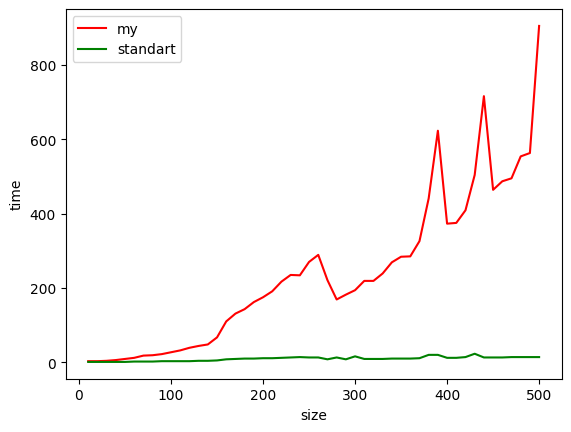

In [5]:
# Сортировка вставкой.
# Сложность O(n^2)

def insertionSort(arr):
    for i in range(1, len(arr)):
        temp = arr[i]
        j = i - 1
        while (j >= 0 and temp < arr[j]):
            arr[j + 1] = arr[j]
            j = j - 1
        arr[j + 1] = temp

matrix = generateMatrix(10, 10, 0, 10)
for i in range(0, len(matrix)):
  insertionSort(matrix[i])
printMatrix(matrix)

generateGraphic(insertionSort, 10, 501, 10, 50)

[0, 0, 1, 3, 4, 5, 6, 8, 9, 10]
[0, 3, 4, 5, 5, 6, 7, 8, 10, 10]
[1, 2, 3, 3, 3, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 6, 8, 9, 10]
[1, 3, 3, 3, 4, 5, 5, 7, 10, 10]
[0, 3, 5, 6, 9, 9, 10, 10, 10, 10]
[0, 1, 1, 1, 2, 2, 4, 8, 9, 9]
[1, 4, 4, 7, 7, 7, 8, 9, 10, 10]
[0, 0, 1, 1, 4, 5, 6, 7, 10, 10]
[1, 1, 1, 2, 6, 7, 7, 8, 8, 10]


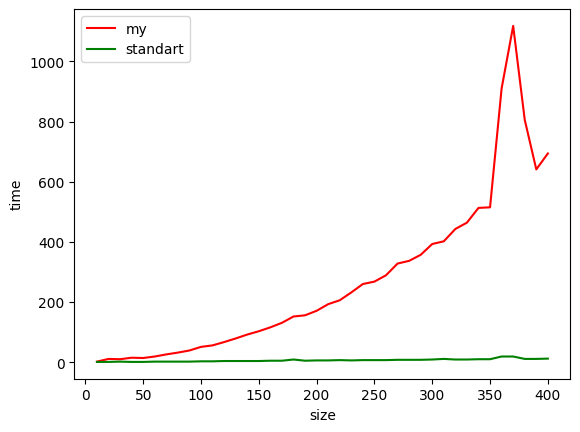

In [6]:
# Сортировка обменом. || Сортировка пузырьком.
# Сложность O(n^2)
def bubbleSort(arr):
    for i in range(len(arr) - 1, 0, -1):
        for j in range(0, i):
            if arr[j + 1] < arr[j]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]

matrix = generateMatrix(10, 10, 0, 10)
for i in range(0, len(matrix)):
  bubbleSort(matrix[i])
printMatrix(matrix)

generateGraphic(bubbleSort, 10, 401, 10, 50)

[0, 0, 2, 4, 7, 7, 8, 8, 9, 9]
[4, 5, 5, 5, 8, 8, 8, 9, 9, 10]
[2, 2, 4, 5, 5, 6, 7, 7, 8, 10]
[2, 3, 3, 4, 5, 6, 7, 8, 9, 9]
[0, 0, 1, 4, 5, 7, 9, 9, 10, 10]
[0, 0, 0, 2, 5, 6, 7, 9, 10, 10]
[1, 1, 3, 5, 6, 6, 9, 9, 9, 9]
[0, 1, 1, 5, 6, 6, 6, 7, 8, 9]
[4, 4, 5, 6, 6, 7, 7, 7, 8, 10]
[0, 1, 2, 3, 7, 7, 7, 7, 8, 10]


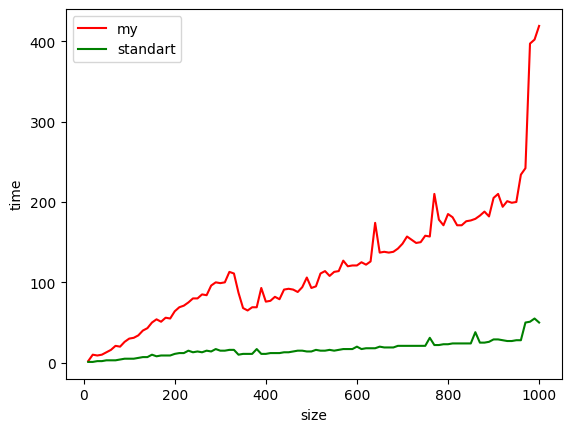

In [8]:
# Сортировка Шелла.
# Сложность O(n^2)
import math
def shellSort(arr):
    size = len(arr)
    interval = size // 2
    while interval > 0:
        for i in range(interval, size):
            temp = arr[i]
            j = i
            while j >= interval and arr[j - interval] > temp:
                arr[j] = arr[j - interval]
                j -= interval
            arr[j] = temp
        interval //= 2

matrix = generateMatrix(10, 10, 0, 10)
for i in range(0, len(matrix)):
  shellSort(matrix[i])
printMatrix(matrix)

generateGraphic(shellSort, 10, 1001, 10, 50)

[0, 1, 1, 3, 3, 7, 8, 8, 9, 9]
[0, 3, 3, 5, 5, 5, 6, 6, 8, 9]
[0, 0, 2, 4, 5, 6, 6, 7, 7, 8]
[3, 4, 5, 5, 5, 6, 6, 6, 7, 10]
[0, 2, 2, 2, 4, 5, 7, 8, 10, 10]
[0, 1, 1, 3, 4, 4, 5, 5, 8, 10]
[1, 4, 5, 5, 6, 6, 6, 6, 8, 10]
[3, 3, 3, 5, 5, 5, 6, 7, 7, 10]
[0, 2, 3, 3, 6, 7, 8, 8, 8, 10]
[2, 3, 3, 4, 4, 5, 7, 7, 8, 10]


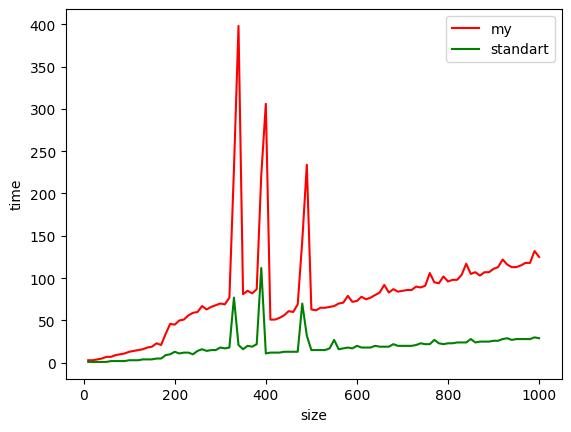

In [12]:
# Быстрая сортировка.
# Сложность O(nlogn)

def quickSort(arr):
  if len(arr) <= 1:
    return arr

  q = arr[len(arr) - 1]
  left = []
  right = []
  curr = []
  for n in arr:
    if n < q:
      left.append(n)
    elif n > q:
      right.append(n)
    else:
      curr.append(n)
  return quickSort(left) + curr + quickSort(right)

matrix = generateMatrix(10, 10, 0, 10)
for i in range(0, len(matrix)):
  matrix[i] = quickSort(matrix[i])
printMatrix(matrix)

generateGraphic(quickSort, 10, 1001, 10, 50)


[1, 1, 2, 3, 4, 4, 4, 10, 10, 10]
[2, 2, 3, 4, 5, 6, 8, 8, 8, 10]
[1, 2, 3, 4, 4, 4, 5, 6, 7, 8]
[1, 1, 2, 2, 3, 5, 5, 7, 10, 10]
[1, 2, 2, 3, 3, 3, 3, 4, 6, 10]
[0, 1, 1, 2, 3, 4, 5, 5, 6, 8]
[0, 1, 3, 4, 6, 7, 8, 10, 10, 10]
[2, 3, 3, 4, 5, 7, 7, 8, 9, 10]
[0, 0, 1, 2, 2, 3, 5, 7, 8, 9]
[0, 2, 2, 3, 5, 6, 7, 8, 10, 10]


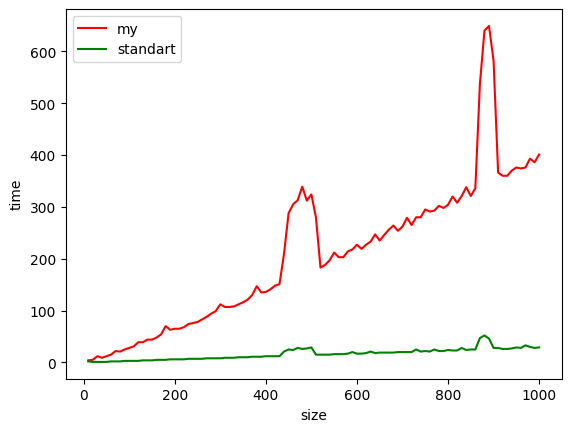

In [14]:
# Турнирная сортировка.
# Сложность O(nlogn)

def heapSort(arr):
    build_max_heap(arr)
    for i in range(len(arr) - 1, 0, -1):
        arr[0], arr[i] = arr[i], arr[0]
        max_heapify(arr, index=0, size=i)

def parent(i):
    return (i - 1)//2

def left(i):
    return 2*i + 1

def right(i):
    return 2*i + 2

def build_max_heap(arr):
    length = len(arr)
    start = parent(length - 1)
    while start >= 0:
        max_heapify(arr, index=start, size=length)
        start = start - 1

def max_heapify(arr, index, size):
    l = left(index)
    r = right(index)
    if (l < size and arr[l] > arr[index]):
        largest = l
    else:
        largest = index
    if (r < size and arr[r] > arr[largest]):
        largest = r
    if (largest != index):
        arr[largest], arr[index] = arr[index], arr[largest]
        max_heapify(arr, largest, size)

matrix = generateMatrix(10, 10, 0, 10)
for i in range(0, len(matrix)):
  heapSort(matrix[i])
printMatrix(matrix)

generateGraphic(heapSort, 10, 1001, 10, 50)


### Вывод
